In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
from google.colab import files
files.upload()

Saving airline-passengers.csv to airline-passengers.csv


{'airline-passengers.csv': b'"Month","Passengers"\r\n"1949-01",112\r\n"1949-02",118\r\n"1949-03",132\r\n"1949-04",129\r\n"1949-05",121\r\n"1949-06",135\r\n"1949-07",148\r\n"1949-08",148\r\n"1949-09",136\r\n"1949-10",119\r\n"1949-11",104\r\n"1949-12",118\r\n"1950-01",115\r\n"1950-02",126\r\n"1950-03",141\r\n"1950-04",135\r\n"1950-05",125\r\n"1950-06",149\r\n"1950-07",170\r\n"1950-08",170\r\n"1950-09",158\r\n"1950-10",133\r\n"1950-11",114\r\n"1950-12",140\r\n"1951-01",145\r\n"1951-02",150\r\n"1951-03",178\r\n"1951-04",163\r\n"1951-05",172\r\n"1951-06",178\r\n"1951-07",199\r\n"1951-08",199\r\n"1951-09",184\r\n"1951-10",162\r\n"1951-11",146\r\n"1951-12",166\r\n"1952-01",171\r\n"1952-02",180\r\n"1952-03",193\r\n"1952-04",181\r\n"1952-05",183\r\n"1952-06",218\r\n"1952-07",230\r\n"1952-08",242\r\n"1952-09",209\r\n"1952-10",191\r\n"1952-11",172\r\n"1952-12",194\r\n"1953-01",196\r\n"1953-02",196\r\n"1953-03",236\r\n"1953-04",235\r\n"1953-05",229\r\n"1953-06",243\r\n"1953-07",264\r\n"1953-08",27

In [0]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





 - 1s - loss: 0.0256
Epoch 2/100
 - 0s - loss: 0.0120
Epoch 3/100
 - 0s - loss: 0.0098
Epoch 4/100
 - 0s - loss: 0.0088
Epoch 5/100
 - 0s - loss: 0.0081
Epoch 6/100
 - 0s - loss: 0.0071
Epoch 7/100
 - 0s - loss: 0.0063
Epoch 8/100
 - 0s - loss: 0.0056
Epoch 9/100
 - 0s - loss: 0.0049
Epoch 10/100
 - 0s - loss: 0.0042
Epoch 11/100
 - 0s - loss: 0.0036
Epoch 12/100
 - 0s - loss: 0.0032
Epoch 13/100
 - 0s - loss: 0.0029
Epoch 14/100
 - 0s - loss: 0.0026
Epoch 15/100
 - 0s - loss: 0.0024
Epoch 16/100
 - 0s - loss: 0.0023
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0021
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s 

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.12 RMSE
Test Score: 46.56 RMSE


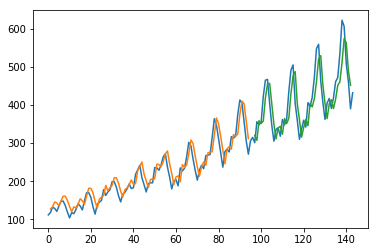

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()